<a href="https://colab.research.google.com/github/Raviiitk25/Survival-prediction-of-Patients-in-Brain-Stroke/blob/main/Survival_Prediction_of_patients_in_Brain_Strokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survival Prediction of patients in Brain Strokes

Importing Libraries and Loading the Data

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Statistical Testing
from scipy.stats import chi2_contingency, chi2
from scipy.stats import pearsonr

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv('brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Basic Information

In [ ]:
# Shape of dataset
print("Shape of dataset:", data.shape)

# Check column info
data.info()

# Summary statistics
data.describe()

Shape of dataset: (4981, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Data cleaning

In [ ]:
# Check missing values
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


Handle missing BMI

In [ ]:
# Fill missing 'bmi' with mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

/tmp/ipython-input-2558325607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


Remove irrelevant or inconsistent data

In [ ]:
# Remove rows with 'gender' = 'Other'
data = data[data['gender'] != 'Other']

# Check duplicates
data.duplicated().sum()

# Drop duplicates if any
data.drop_duplicates(inplace=True)

##Univariate Analysis

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


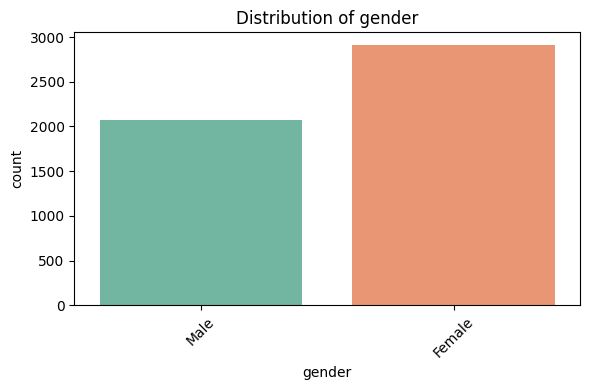

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


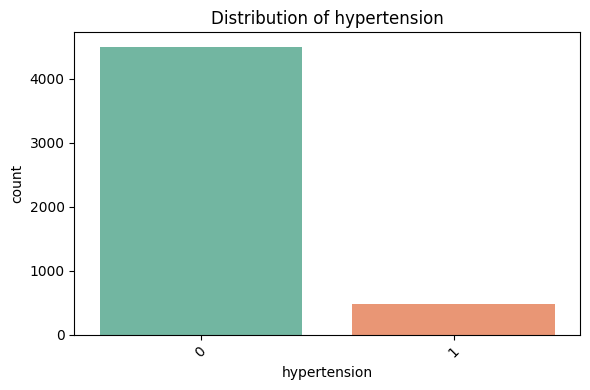

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


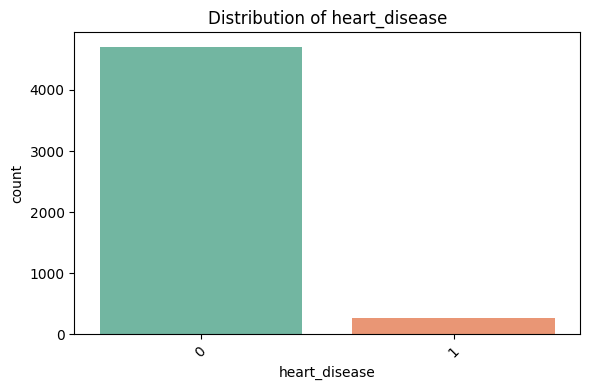

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


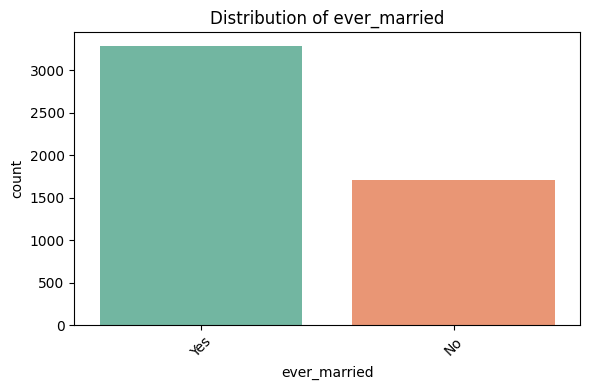

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


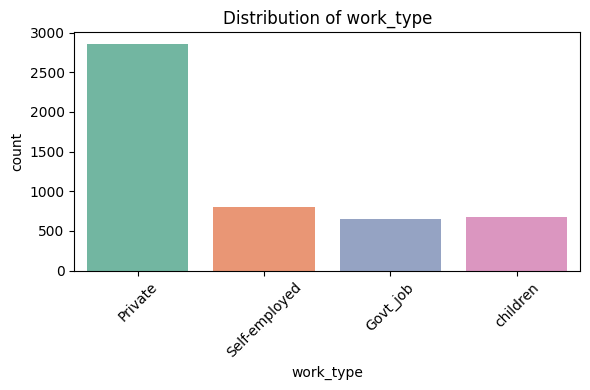

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


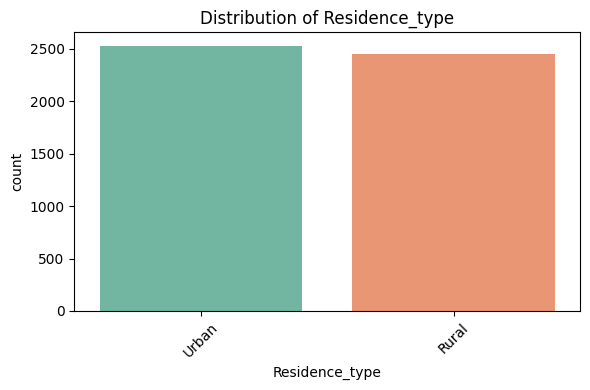

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


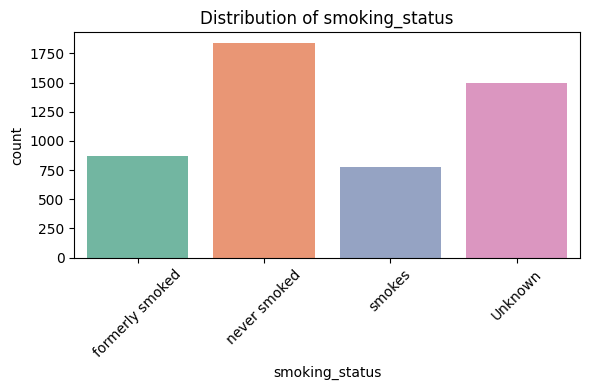

/tmp/ipython-input-1822252897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


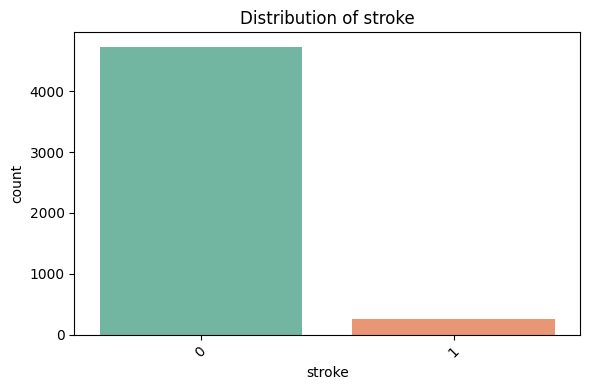

In [ ]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##Numerical variables


We will use histogram and boxplots to see:

*  age
*  avg_glucose-level
*  bmi

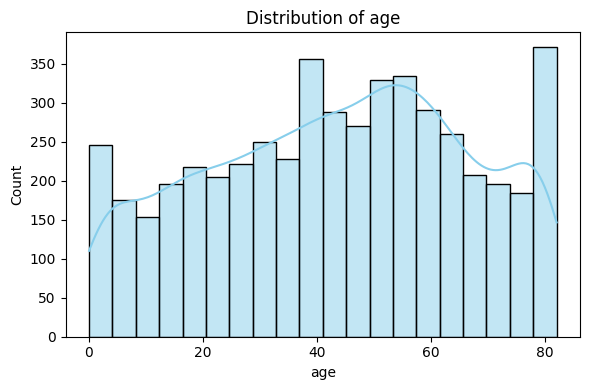

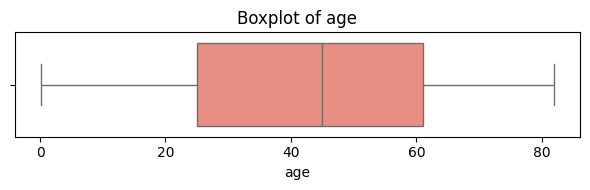

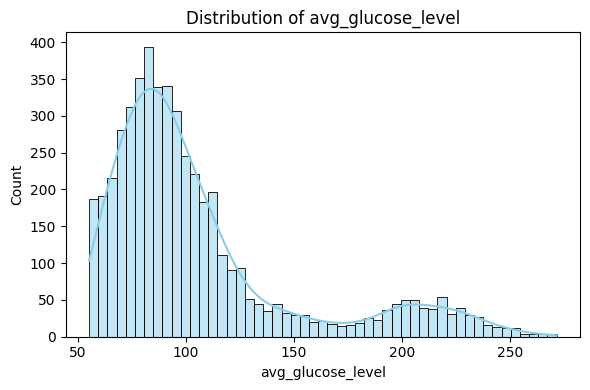

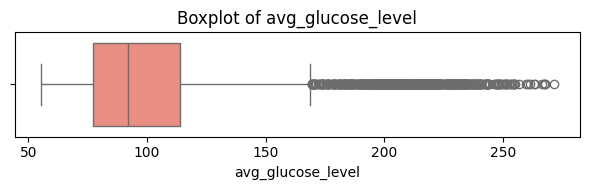

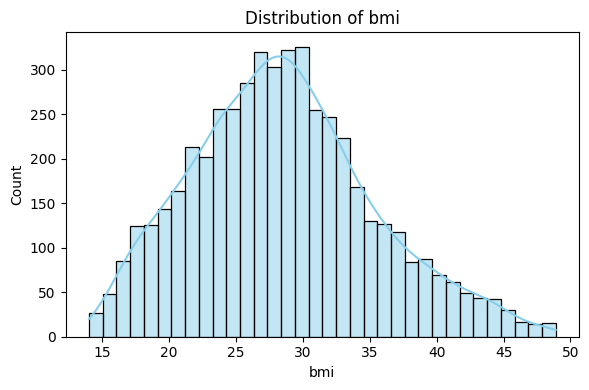

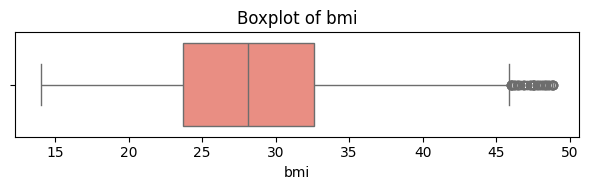

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6,4))

    # Histogram
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=data[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

##Bivariate Analysis

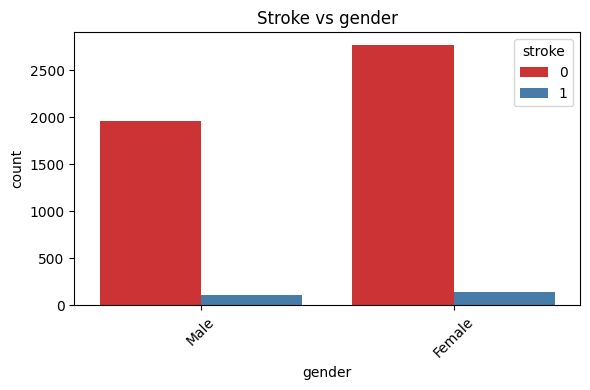

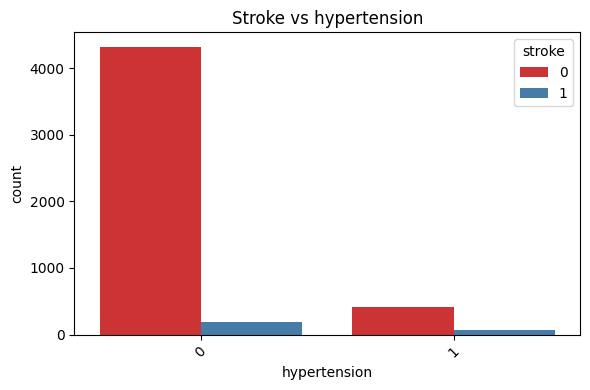

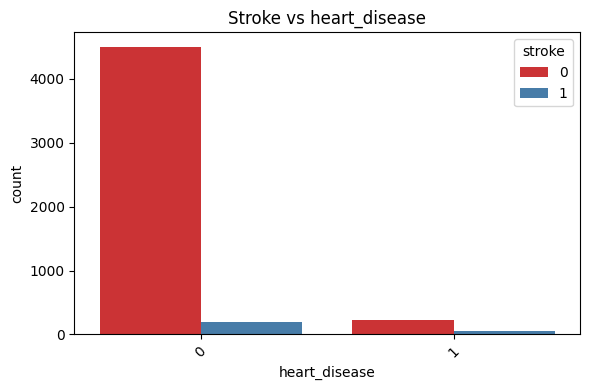

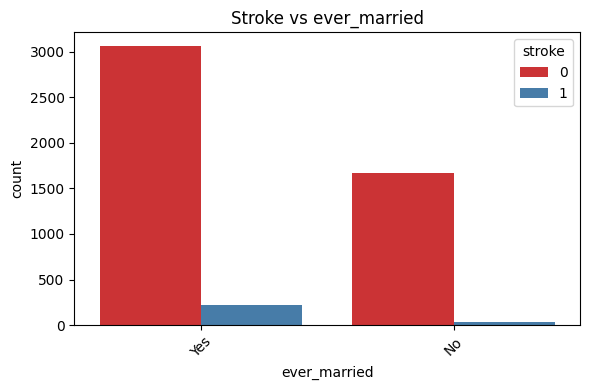

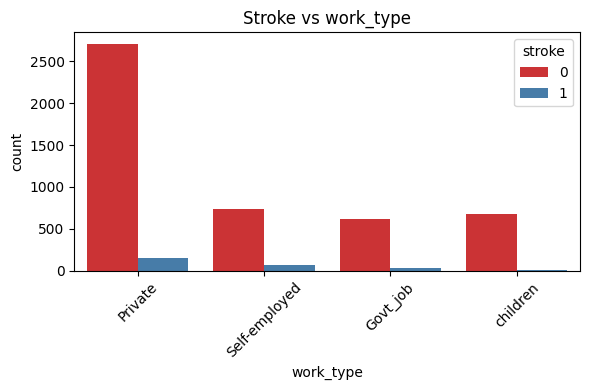

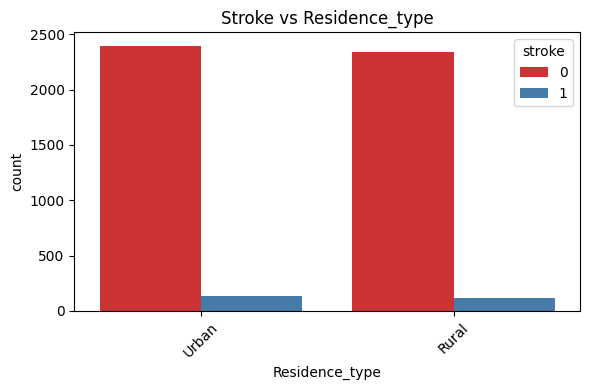

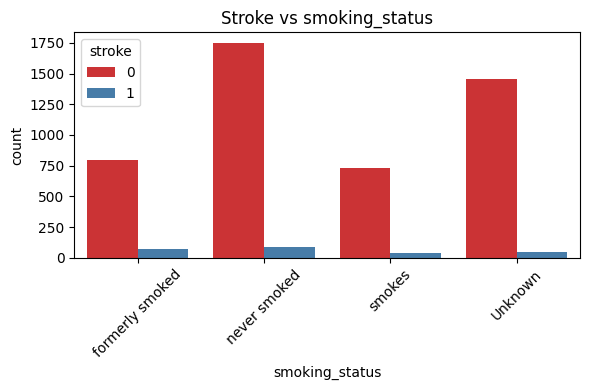

In [ ]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue='stroke', palette='Set1')
    plt.title(f'Stroke vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##Chi-square Test Function

In [ ]:
def chi_square_test(data, col):
    contingency = pd.crosstab(data[col], data['stroke'])
    chi2_val, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square Test between Stroke and {col}")
    print(f"Chi2 Value: {chi2_val:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("👉 Significant relationship found.\n")
    else:
        print("🚫 No significant relationship found.\n")

In [ ]:
for col in categorical_cols:
    chi_square_test(data, col)

Chi-square Test between Stroke and gender
Chi2 Value: 0.31, p-value: 0.5755
🚫 No significant relationship found.

Chi-square Test between Stroke and hypertension
Chi2 Value: 84.70, p-value: 0.0000
👉 Significant relationship found.

Chi-square Test between Stroke and heart_disease
Chi2 Value: 87.57, p-value: 0.0000
👉 Significant relationship found.

Chi-square Test between Stroke and ever_married
Chi2 Value: 57.48, p-value: 0.0000
👉 Significant relationship found.

Chi-square Test between Stroke and work_type
Chi2 Value: 47.83, p-value: 0.0000
👉 Significant relationship found.

Chi-square Test between Stroke and Residence_type
Chi2 Value: 1.21, p-value: 0.2718
🚫 No significant relationship found.

Chi-square Test between Stroke and smoking_status
Chi2 Value: 28.73, p-value: 0.0000
👉 Significant relationship found.



##Numerical variables vs Stroke

/tmp/ipython-input-2280338298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette="Set3")


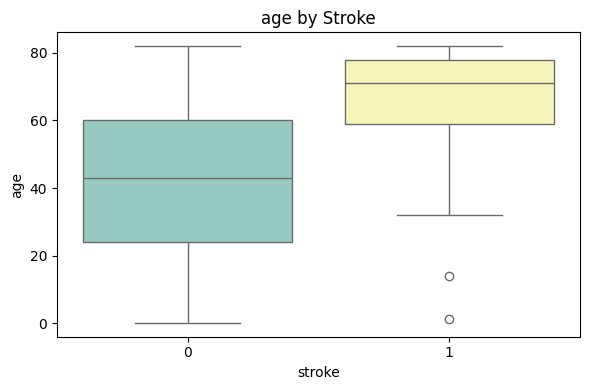

/tmp/ipython-input-2280338298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette="Set3")


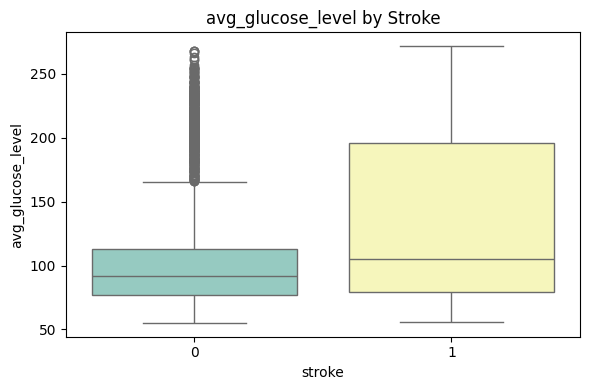

/tmp/ipython-input-2280338298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette="Set3")


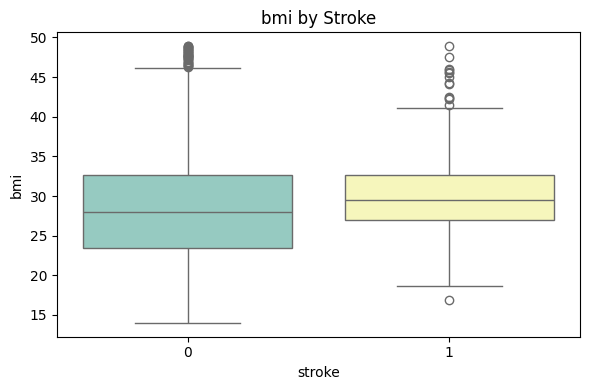

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x='stroke', y=col, palette="Set3")
    plt.title(f'{col} by Stroke')
    plt.tight_layout()
    plt.show()

Group Mean Comparison

In [ ]:
for col in numerical_cols:
    print(f"\nMean of {col} by Stroke Status:")
    print(data.groupby('stroke')[col].mean())


Mean of age by Stroke Status:
stroke
0    42.141348
1    67.819839
Name: age, dtype: float64

Mean of avg_glucose_level by Stroke Status:
stroke
0    104.569056
1    132.175565
Name: avg_glucose_level, dtype: float64

Mean of bmi by Stroke Status:
stroke
0    28.409698
1    30.186694
Name: bmi, dtype: float64


Statistical Correlation for Numerical Variables

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    corr, p_value = pearsonr(data[col], data['stroke'])
    print(f"\nCorrelation between {col} and stroke:")
    print(f"Pearson Correlation: {corr:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("👉 Significant linear relationship found.")
    else:
        print("🚫 No significant linear relationship found.")


Correlation between age and stroke:
Pearson Correlation: 0.2465, p-value: 0.0000
👉 Significant linear relationship found.

Correlation between avg_glucose_level and stroke:
Pearson Correlation: 0.1332, p-value: 0.0000
👉 Significant linear relationship found.

Correlation between bmi and stroke:
Pearson Correlation: 0.0569, p-value: 0.0001
👉 Significant linear relationship found.


Machine Learning Model Building

In [ ]:
# Copy data
df = data.copy()

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("📘 Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

📘 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       943
           1       0.24      0.20      0.22        54

    accuracy                           0.92       997
   macro avg       0.60      0.58      0.59       997
weighted avg       0.92      0.92      0.92       997

Accuracy: 0.921765295887663


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("📘 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

📘 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997

Accuracy: 0.9408224674022067
